## EAS 503 Homework 2 Submission
Name - Sai Kiran Putta

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw2.ipynb**


### Submission Details 
* **Due Date** - October 17, 2017 by 11.59 PM PST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Inheritance and Encapsulation (10 points)

Consider a class of credit card accounts. A credit card account can have 2 types of credit cards:
1. Primary card  
2. Supplement card (Sup-card)

A primary account is the main account to which multiple sup-cards are linked. The primary credit card holder will be responsible for the bill payments for all the transactions on the primary card itself as well as all its supplimentary cards. Assume that each sup-card has the same individual credit limit as the primary credit card. Any transaction over the permitted account credit limit must be denied i.e. if the total account balance exceeds the credit limit on the primary account, any transaction, on all the cards linked to the account (primary or sup-card), will be denied.

For this problem, design a class `PrimaryCard` with all the account details and primary credit card details included in the class. Construct a sub-class of supplementary card holder, `SupplementaryCard`, linked to a primary credit card account. Ensure that the sensitive details of all the accounts (credit card numbers, balance, account limit etc.) must saved and accessed securely. 

Use the `Account_details.txt` file to access the account details for 15 credit cards. The transaction details for the month of october are provided in `transaction.txt` file. Design an algorithm to update the account balance on all the accounts and plot the final account balance on each day for the month of october.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [2]:
#Enter your solution here
class PrimaryCard:
    def __init__(self, customer_id, card_number, card_type, card_limit, card_balance):
        self.__card_number = card_number
        self.__card_type = card_type
        self.__card_limit = card_limit
        self.__card_balance = card_balance
        self.__customer_id = customer_id
        self.__cardlist = []
    
    def get_customerid(self):
        return(self.__customer_id)
    
    def get_CardNumber(self):
        return(self.__card_number)
    
    def get_Cardtype(self):
        return(self.__card_type)
    
    def get_Cardlimit(self):
        return(self.__card_limit)
    
    def get_Cardbalance(self):
        return(self.__card_balance)
    
    def append_Cards(self, newcard):
        self.__cardlist.append(newcard)
    
    def set_Cardbalance(self, purchase):
        self.__card_balance = float(self.__card_balance) + float(purchase)
    
class SupplementaryCard(PrimaryCard):
    def __init__(self, customer_id, card_number, card_type, card_limit, card_balance, primarycardnumber_ofsecondcard):
        super().__init__(customer_id, card_number, card_type, card_limit, card_balance)
        self.__primarycardnumber_ofsecondcard = primarycardnumber_ofsecondcard
    
    def get_primarycardnumber_ofsecondcard(self):
        return(self.__primarycardnumber_ofsecondcard)
    #If the card is secondary and the primary limit is different to secondary, we change it. 
    #Have to do it. Pending. 
    def set_Cardlimit(self, newlimit):
        self.card_limit = newlimit 
        
    def get_Totalbalance(self):
        balance_list = [a.get_Cardbalance for a in self.__cardlist]
        return(sum(balance_list))
   
    
class Account:
    def __init__(self, customer_id, card_number, account_number):
        self.__customer_id = customer_id
        self.__account_number = account_number
        self.__card_number = card_number
        self.__cardsdict = {}
        
    def append_cards(self,card): #card should be a supplementary card object. 
        if(self.get_cardnumber() in self.get_cardsdict().keys()):
            self.get_cardsdict[self.get_cardnumber()].append(card)
        else:
            self.get_cardsdict()[self.get_cardnumber()] = [card]
            
    
    def get_customerid(self):
        return(self.__customer_id)
    def get_accountnumber(self):
        return(self.__account_number)
    def get_cardnumber(self):
        return(self.__card_number)
    def get_cardsdict(self):
        return(self.__cardsdict)
    

In [3]:
import csv
accounts = {} #key is account_number, value is CARD_OBJECT.

account_primaryconnection = {} #key is account, value is [primary card, primarycardlimit]. 
secondary_accountconnection = {} #key is secondary, value is primary card. 


customerid_accountconnection = {}

#all the cards with primary being populated. Also should establish connection 
with open('./Account_details.txt') as f:
    reader = csv.reader(f, delimiter = "\t")
    next(reader)
    for row in reader:
        
        customerid_accountconnection[row[0]] = row[2]
    
        if(row[3] == "P"):
            account = Account(row[0], row[1], row[2])
            card_details = PrimaryCard(row[0], row[1], row[3], row[4], row[5])
            

            if(account.get_accountnumber() in accounts.keys()):
                accounts[account.get_accountnumber()].append(card_details)
            else:
                accounts[account.get_accountnumber()] = [card_details]
                account_primaryconnection[account.get_accountnumber()] = [card_details.get_CardNumber(), card_details.get_Cardlimit()]
        else:
            #we have the secondary card. populate secondary_accountconnection
            account = row[2]    
            secondary_card = row[1]
            secondary_accountconnection[secondary_card] = account


In [4]:
#create a link between secondary card number and [primary card limit, primary account]. 
secondarycard_primaryinfo = {}
for i in secondary_accountconnection.keys():
    secondarycard_primaryinfo[i] = account_primaryconnection[secondary_accountconnection[i]]


In [5]:
#all the secondary cards being populated with requried correct 'credit limit'. 
with open('./Account_details.txt') as f:            
    reader = csv.reader(f, delimiter = "\t")
    next(reader)
    for row in reader:
        if(row[3] == "S"):
            account = Account(row[0], row[1], row[2])
            card_details = SupplementaryCard(row[0], row[1], row[3], secondarycard_primaryinfo[row[1]][1], row[5],secondarycard_primaryinfo[row[1]][0])
            accounts[account.get_accountnumber()].append(card_details)
       

In [6]:
customerid_cardlimit = {}
#Now update the limit from limit_list. 
for index, account_number in enumerate(accounts.keys()):
    for card_i in range(0, len(accounts[account_number])):
        #accounts[account_number][card_i].set_Cardlimit(limit_list[index])
        #print(account_number, ":", accounts[account_number][card_i].get_Cardlimit())
        #print("Customerid:", accounts[account_number][card_i].get_customerid(), "Cardlimit:", accounts[account_number][card_i].get_Cardlimit())
        customerid_cardlimit[accounts[account_number][card_i].get_customerid()] = accounts[account_number][card_i].get_Cardlimit()


In [7]:
def get_totalbalance_foraccount(account):
    sum = 0
    for i in account:
        sum = sum + int(i.get_Cardbalance())
    return(sum)
#get_totalbalance_foraccount('4652')

In [8]:
final_balancedict = {}  #account_number : [balance, date.]
    
    
with open('./transaction.txt') as f:            
    reader = csv.reader(f, delimiter = "\t")
    next(reader)
    for row in reader:
        #row[0] has the customerid names.
        card_limit = customerid_cardlimit[row[0]]
        
        #get the total balance. 
        accounts[customerid_accountconnection[row[0]]][0].set_Cardbalance(float(row[1]))
        total_balance = get_totalbalance_foraccount(accounts[customerid_accountconnection[row[0]]])
        account_number = customerid_accountconnection[row[0]]
        if(float(total_balance) > float(card_limit)):
            print("Balance exeeded card limit.")
        else:
            if(account_number in final_balancedict.keys()):
                final_balancedict[account_number].append([total_balance, row[2]])
            else:
                final_balancedict[account_number] = [[total_balance, row[2]]]
            
       

Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.
Balance exeeded card limit.


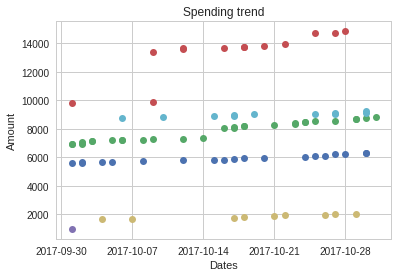

In [9]:
import matplotlib.dates as dates
total_y = []
for i in final_balancedict.keys():
    trancs_data = final_balancedict[str(i)]
    y = [innerlist[1] for innerlist in trancs_data]
    y = dates.datestr2num(y)
    total_y.extend(y)
    x = [innerlist[0] for innerlist in trancs_data]
    plt.plot_date(y,x,label = str(i))
plt.title("Spending trend")
plt.xlabel("Dates")
plt.ylabel("Amount")

### Problem 2 - Polynomials (15 Points)

Consider a general form of an nth order polynomial. You are asked to implement a polynomial of arbitrary degree using classes in python. For instance consider the polynomial:
$$4x^3 + 3x^2 + 7 = 0$$

For this implements the following steps:
1. Implement a class that represents a single term. 
2. Implement a class for the entire polynomial. 
3. Implement an operator ($*$) to multiply two single terms, a term and a polynomial, and two polynomials. (__Note__: _you can overload the $*$ operator in Python by defining a method called ``__mul__(self,other):`` and make it mutiply the ``self`` object with the ``other`` object)
4. Implement an operator(s) that enables addition of a term and a polynomial and/or two polynomials. (__Note__: _you can overload the  $+$  operator in Python by defining a method called ``__add__(self,other)``: and make it add the self object with the other object)
5. Implement the following two internal methods within ``Polynomial`` class:
    - ``order()``, which returns the order of the polynomial (as an ``int``).
    - ``solve()``, which returns solutions for the polynomial (a ``list`` of roots). Only do it for quadratic polynomials, and raise an exception for higher order polynomials.
6. Implement an external function that plots the polynomial on a domain of [-10,10] (you will have to use _matplotlib_ rountines for this).
7. Include a destructor function for the polynomial class.

Use the above class definitions and operators to generate the solutions (wherever needed) for the following set of polynomials:

1. $x^2 -7x +3=0$
2. $x^3 -8x +5=0$
3. Consider the following three polynomials: $f(x)=x,$ $g(x)=x^2$ and $p(x)=9x^2 +2$. Plot the function $f(x)-g(x)*p(x)=0$ by taking $f,g,p$ as input functions. For this, use the ``__mul__(self,other)`` and ``__add__(self,other)`` methods.

Note: Here you are basically asked to define the basis for the vector space of real polynomials and define all the vector operations.

In [10]:
#Enter your solution here

#The question has been solved assuming that order(polynomial-1) is smaller or equal to order(polynomial-2)


class Term:
    def __init__(self, power, coeff):
        self.power = power
        self.coeff = coeff
        self.get_power()
    
    def get_power(self):
        if(self.power > 0):
            self.power = 1
        else:
            self.power = 0
        
    def get_term(self):
        return([self.power, self.coeff])
    
    
class Polynomial:
    """
    The Polynomial class can add, sub and multiply two different polynomials. It assumes that the order of 
    first polynomial is less than or equal to order of second polynomial. 
    
    It can also plot a given polynomial.
    """
    def __init__(self, powers, coefficients):
        self.powers = powers
        self.coefficients = coefficients
        self.order_poly = len(self.powers) - 1
        
    def get_powers(self):
        return(self.powers)
    
    def get_coefficients(self):
        return(self.coefficients)
    
    
    def get_y(self, i, power_list, coefficient_list):
        final_y = 0
        for index in list(range(0, len(power_list))):
            final_y = final_y + (coefficient_list[index]*(pow(i, index)))
        return(final_y)
    
    
    def plot_polynomial(self):
        """
        The function expects a polynomial class object and plots a plot in the range -10 to 10. 
        """
        power_list = self.get_powers()
        coefficient_list = self.get_coefficients()
        
        x = []
        y = []
        for i in list(np.linspace(-10, 10, 100)):
            x.append(i)           
            y.append(self.get_y(i, power_list, coefficient_list))   
        plt.plot(x,y)
            
            
    def __add__(self, other_polynomial):
        """
        The method add two polynomials. 
        """
        greater_length = max(len(self.get_powers()), len(other_polynomial.get_powers()))
        lower_length = min(len(self.get_powers()), len(other_polynomial.get_powers()))
        new_power = [0] * lower_length
        new_coefficient = [0] * lower_length
        
        for i in list(range(0, lower_length)):
            new_power[i] = self.get_powers()[i] + other_polynomial.get_powers()[i]
            new_power[i] = 1 if new_power[i] > 0 else 0
            
            new_coefficient[i] = self.get_coefficients()[i] + other_polynomial.get_coefficients()[i]
        
        #if the second polynomial is or order > order of first polynomial.
        #extend lower_length to end for powers and coefficients. 
        new_power.extend(other_polynomial.get_powers()[lower_length:])
        new_coefficient.extend(other_polynomial.get_coefficients()[lower_length:])
            
        self.order_poly = greater_length - 1
        return(new_power, new_coefficient)
    
    
    
    def __sub__(self, other_polynomial):
        """
        The method subracts two polynomials
        """
        greater_length = max(len(self.get_powers()), len(other_polynomial.get_powers()))
        lower_length = min(len(self.get_powers()), len(other_polynomial.get_powers()))
        new_power = [0] * lower_length
        new_coefficient = [0] * lower_length
        
        for i in list(range(0, lower_length)):
            new_power[i] = self.get_powers()[i] + other_polynomial.get_powers()[i]
            new_power[i] = 1 if new_power[i] > 0 else 0
            
            new_coefficient[i] = self.get_coefficients()[i] - other_polynomial.get_coefficients()[i]
            
            
        #if the second polynomial is or order > order of first polynomial.
        #extend lower_length to end for powers and coefficients. 
        new_power.extend(other_polynomial.get_powers()[lower_length:])
        new_coefficient.extend(other_polynomial.get_coefficients()[lower_length:])
            
        for sub_index in list(range(lower_length, len(new_power))):
            new_coefficient[sub_index] = -new_coefficient[sub_index]
                
        self.order_poly = len(new_power) - 1 
        return(new_power, new_coefficient)
    
    
    
    def __mul__(self, other_polynomial):
        """
        The method multiplies two polynomials.
        """
        result_length = (len(self.get_powers())-1) + (len(other_polynomial.get_powers())-1) + 1
        new_power = np.repeat(0, result_length)
        new_coefficient = np.repeat(0, result_length)
        
        #changes for powers. 
        for i in list(range(0, len(self.get_powers()))):
            for j in list(range(0, len(other_polynomial.get_powers()))):
                    #computations for powers. 
                if(self.get_powers()[i] == 1 and other_polynomial.get_powers()[j] == 1):
                    new_power[i+j] = 1
                    
                    
        #changes for coefficients. 
        for i in list(range(0, len(self.get_coefficients()))):
            for j in list(range(0, len(other_polynomial.get_coefficients()))):
                new_coefficient[i+j] = new_coefficient[i+j] + (self.get_coefficients()[i] * other_polynomial.get_coefficients()[j])
        
        self.order_poly = len(new_power) - 1
        return(new_power, new_coefficient)
    
    def order(self):
        return(self.order_poly)
    
    def solve(self):
        """
        The method returns the factors of quadratic equation. 
        If the order of polynomial is greater than 2 it prints a statement via exception handling.
        """
        coefs = self.get_coefficients()
        try:
            if(len(coefs) > 3):
                raise HigherOrderPolynomialError("Higher order polynomial given. Give a polynomial of order 2.")
            else:
                a,b,c = coefs[2], coefs[1], coefs[0]
                root1 = ((-b) + np.sqrt(b^2 - (4*a*c)))/ (2*a)
                root2 = ((-b) - np.sqrt(b^2 - (4*a*c))) / (2*a)
                return(root1, root2)
        except HigherOrderPolynomialError as err:
            print(err)
            
    def __del__(self):
        print("Destructor called.")
            
class HigherOrderPolynomialError(Exception):
    def __init__(self, message):
        self.message = message
    
    def __str__(self):
        return(str(self.message))

Roots:  (5.4364916731037081, 1.5635083268962915)


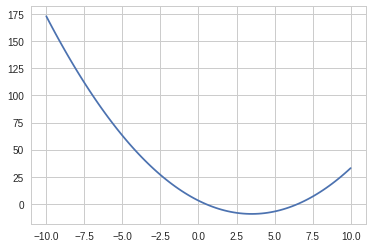

In [11]:
#question-1 
term1 = Term(2,1)
term2 = Term(1 ,-7)
term3 = Term(0,3)

poly1_powers = [term1.get_term()[0], term2.get_term()[0], term3.get_term()[0]+1][::-1]
poly1_coeffs = [term1.get_term()[1], term2.get_term()[1], term3.get_term()[1]][::-1]

poly_q1 = Polynomial(poly1_powers, poly1_coeffs)
print("Roots: ",poly_q1.solve())
poly_q1.plot_polynomial()

Higher order polynomial given. Give a polynomial of order 2.
Roots:  None


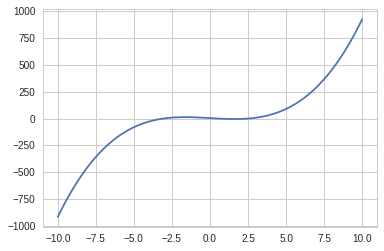

In [12]:
#question-2 
term1 = Term(3,1)
term2 = Term(0,0)
term3 = Term(1 ,-8)
term4 = Term(0,5)

poly1_powers = [term1.get_term()[0], term2.get_term()[0], term3.get_term()[0],term4.get_term()[0]+1][::-1]
poly1_coeffs = [term1.get_term()[1], term2.get_term()[1], term3.get_term()[1],term4.get_term()[1]][::-1]

#print(poly1_powers, poly1_coeffs)
poly_q2 = Polynomial(poly1_powers, poly1_coeffs)
print("Roots: ",poly_q2.solve())
poly_q2.plot_polynomial()

In [13]:
#question-3
poly1_term1 = Term(1,1)
poly2_term1 = Term(2,1)
poly2_term2 = Term(0,0)
poly2_term3 = Term(0,0)
poly3_term1 = Term(2 ,9)
poly3_term2 = Term(0,0)
poly3_term3 = Term(0,2)

#poly-1 : x
poly1_q3 = Polynomial([poly1_term1.get_term()[0]],[poly1_term1.get_term()[1]])

#poly-2 : x^2
poly2_powers = [poly2_term1.get_term()[0], poly2_term2.get_term()[0], poly2_term3.get_term()[0]][::-1]
poly2_coeffs = [poly2_term1.get_term()[1], poly2_term2.get_term()[1], poly2_term3.get_term()[1]][::-1]

poly2_q3 = Polynomial(poly2_powers, poly2_coeffs)


#poly-3 : 9x^2 + 2
poly3_powers = [poly3_term1.get_term()[0], poly3_term2.get_term()[0], poly3_term3.get_term()[0]+1][::-1]
poly3_coeffs = [poly3_term1.get_term()[1], poly3_term2.get_term()[1], poly3_term3.get_term()[1]][::-1]

poly3_q3 = Polynomial(poly3_powers, poly3_coeffs)



In [14]:
poly4_q3 = poly2_q3 * poly3_q3

poly5_q3 = Polynomial(list(poly4_q3[0]), list(poly4_q3[1]))
final_polynomial = poly1_q3 - poly5_q3
final_polynomial = Polynomial(list(final_polynomial[0]), list(final_polynomial[1]))

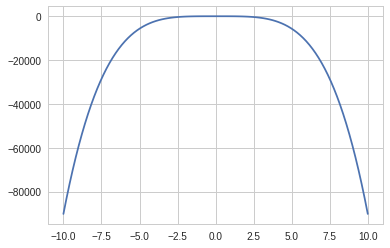

In [15]:
final_polynomial.plot_polynomial()

### Problem 3 - Random Walk (15 Points)

Imagine you are standing at (0,0) on the real plane. At every time step, assume you either take a unit step in one of the four directions (right, left, up, down) with equal probability. This means that after one time step, your new location can be (1,0), (-1,0), (0,1) or (0,-1) with equal probability.

For this, create a class `Walker`. The class needs to store the following information:
- current position of the walker, where the position is a 2-tuple. You can initialize it to (0,0)
- path taken so far by the walker (initially this list will only contain the current position)
- method called ``getDirection()`` that determines the direction for the next step (one out of four possible directions: right, left, up, down). To determine the direction, sample a random value from the set {1,2,3,4} using `np.random.randint(0,N)` and assign each outcome to a unit step movement in a particular direction.
- method called ``walk()`` which changes the current position of the walker in a specifed direction. Make sure to update the path field to incorporate the next position.

After implementing the `Walker` class, you need to conduct the following experiment.
Suppose you want to figure out, how many steps will it take for the walker to go outside a pre-defined perimeter (centered at (0,0)). You will have simulate a random walk and keep checking the current position to figure that out. 

Write a code to run the following simulation:
Starting from (0,0), have your walker randomly walk around (using the defined ``walk()`` method), until it steps out of a rectangular area with vertices as: (-4,-4), (-4,4), (4,4), (4,-4). Count the number of steps taken before the walker leaves the area. Repeat the simulation 5 times and report the average number of steps taken by the walker before it exits the area.

Plot the path taken in each of the 5 simulation runs (you should all five walks in one graph using different colors).

In [ ]:
#Enter your solution here
class Walker:
    def __init__(self):
        self.current_position = (0,0)
        self.all_steps = [(0,0)]
        
    def get_currentposition(self):
        return(self.current_position)
    
    def get_allsteps(self):
        return(self.all_steps)
    
    def getDirection(self):
        possible_steps = [(0,1), (1,0), (0,-1), (-1,0)]
        random_index = np.random.randint(0,4)
        self.current_position = (self.get_currentposition()[0] + possible_steps[random_index][0], 
                                self.get_currentposition()[1] + possible_steps[random_index][1])
        self.all_steps.append(possible_steps[random_index])
    
step_list = []
plot_data = []
for i in range(0,5):
    walker_object = Walker()
    path = [walker_object.get_currentposition()]
    
    steps = 0
    while(abs(walker_object.get_currentposition()[0]) < 4 and abs(walker_object.get_currentposition()[1]) < 4):
        #print("current position:", walker_object.get_currentposition())
        walker_object.getDirection()
        path.append(walker_object.get_currentposition())
        steps = steps + 1
    step_list.append(steps)
    plot_data.append(path)
    
print("Average Steps: ", np.mean(step_list))
    
    
    
plt.figure(figsize = (15,8)) 
for plots_index in range(0,5):
    x = [i[0] for i in plot_data[plots_index]]
    y = [i[1] for i in plot_data[plots_index]]
    
    plt.plot(x,y, label = "simul-%s"%(plots_index+1))
plt.legend()


### Problem 4 - Inverse Transform Sampling (10 Points)

Random sample for any distribution can be generated from a random sample from uniform distribution. This can be done using **Inverse transform Sampling**. For example, suppose you want to create a sample of size $n$ from an _exponential distribution_. To obtain this sample:
1. Generate a sample of size $n$ from Uniform[0,1].
2. Identify the inverse of the CDF function of the distribution of your choice (this needs to be done manually and implemented). In our example, it is exponential distribution. Call this function ``inverseCDFExponential()``. Note that you are not allowed to use any routines from ``np.random`` package here. This function should take two arguments, first is the sample point, and the second is the distribution parameter value, $\lambda$.
3. Apply the ``inverseCDFExponential()`` function on each of the $n$ sample points that you generated in step 1. The $n$ outputs will be the sample from your desired distribution. 

Using the above implementation, generate a sample of size 100 from an  Exponential ($\lambda=4$) distribution.

Your output must include the mean, variance and distribution plot (a histogram) for the generated sample. 

Mean: 0.2557101331978672
Variance: 0.07357663515042558


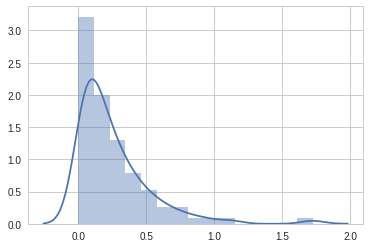

In [6]:
#Enter your solution here
import math
def get_Uniform_Distribution(N):
    return(np.linspace(0.001,1, num = N))


def inverseCDFExponential(lambda_val):
    data_sequence = get_Uniform_Distribution(N = 100)
    for index, data in enumerate(data_sequence):
        data_sequence[index] = (-1/lambda_val) * math.log(data)
    return(data_sequence)


inverseCDF_list = inverseCDFExponential(4)
inverseCDF_mean = np.mean(inverseCDF_list)
inverseCDF_variance = np.var(inverseCDF_list)

print("Mean: {}\nVariance: {}".format(inverseCDF_mean, inverseCDF_variance))
sns.distplot(inverseCDF_list)


In [3]:
import numpy as np
np.linspace(0.001,1, num = 100)

array([ 0.001     ,  0.01109091,  0.02118182,  0.03127273,  0.04136364,
        0.05145455,  0.06154545,  0.07163636,  0.08172727,  0.09181818,
        0.10190909,  0.112     ,  0.12209091,  0.13218182,  0.14227273,
        0.15236364,  0.16245455,  0.17254545,  0.18263636,  0.19272727,
        0.20281818,  0.21290909,  0.223     ,  0.23309091,  0.24318182,
        0.25327273,  0.26336364,  0.27345455,  0.28354545,  0.29363636,
        0.30372727,  0.31381818,  0.32390909,  0.334     ,  0.34409091,
        0.35418182,  0.36427273,  0.37436364,  0.38445455,  0.39454545,
        0.40463636,  0.41472727,  0.42481818,  0.43490909,  0.445     ,
        0.45509091,  0.46518182,  0.47527273,  0.48536364,  0.49545455,
        0.50554545,  0.51563636,  0.52572727,  0.53581818,  0.54590909,
        0.556     ,  0.56609091,  0.57618182,  0.58627273,  0.59636364,
        0.60645455,  0.61654545,  0.62663636,  0.63672727,  0.64681818,
        0.65690909,  0.667     ,  0.67709091,  0.68718182,  0.69